## Step_1: preparing simulated mutated genome
In this step, 300 SNPs and 20 Indels (1 - 10 bases) are generated using script `make_mutation_gene.py`. The original input, i.e., reference genome sequence, must be provided as a fasta file. It will be converted into a sequence used to construct the mutated genome. The simulated mutated genome is saved in`simulated_mutate_genome.txt` for later usage. All simulated mutations are recorded in a CSV file named `simulated_mutation.csv` with four columns: Operation (SNP, Insertion, Deletion), POS (position), REF (base in reference genome), and ALT (simulated mutation).

## step_2: simulating paired-end reading from Illumina and stored outcome in two fastq files
In this step, the `simulated_mutated_genome.txt ` file generated in step_1 is used to prepare 100-bases paired-end reads with a 30 reading depth from Illumina. The resulting reads are saved as a pair of fastq files: `simulated_read_1.fastq` and `simulated_read_2.fastq`. These fastq files will be used to map the reads to the reference genome and to run bcftools for variant calling. The mapping and variant calling processes are performed on the server using command line.

## step_3: comparing the result from variant caller with simulated mutations record
The outcome of variant calling, `vcf_variants.vcf`, is downloaded from the server and compared with the recorded `simulated_mutation.csv`. The output, `merged_result.csv`, contains six columns, POS (position), REF (base in reference genome), ALT (base in mutated genome), Type (SNP or INDEL), Match_Status (MATCH or MISMATCH), adn Source (Both, CSV_only, and VCF_only).

## discussion: What is the precision and recall of the SNP caller?
There are 320 mutations in the simulated genome and bcftools can detect 319 of them. In the `merged_result.csv`, two types of mismatch can be observed.

![Simulated SNP cannot be detected by bcftools](SNP_CSV_only.png)
**Figure 1.** Example of simulated SNP cannot be detected by bcftools, but recorded in the csv file.


![Indel can be detected by bcftools, but record in a different way with cvs file](Indel_VCF_and_CSV.png)
**Figure 2.** Example of indel can be detected by bcftools, but recorded in a different way with cvs file.

Overall, in the simulated mutated genome, there is only one SNP that cannot be detected by bcftools, while all other mismatches are due to differences in recording methods. Based on the example in Figure 2, the simulated mutation is located at position 861277, with the recorded reference base as "G" at position 861276. The result for bcftools also starts from position 861276, but the recorded reference is "GT". This discrepancy can be explained by the ambiguity caused by repeated sequences in this position and the underlying algorithm of bcftools. This mutation can be recorded in different ways by the variant caller; bcftools follows the parsimony principle and records the mutation in a different way by simply including anchoring bases at a certain position. Therefore, the precision and recall of the bcftools is very high and almost matches all the simulated mutations.

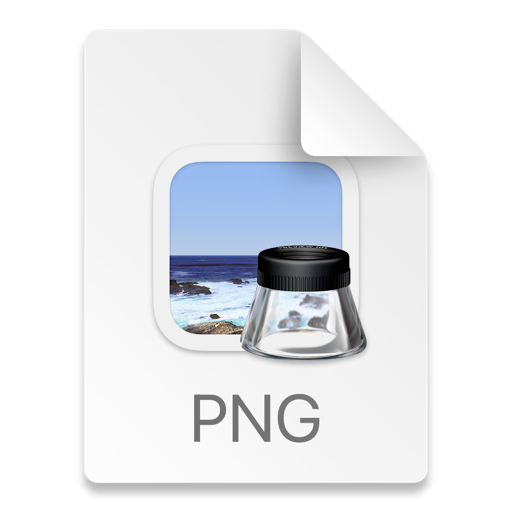
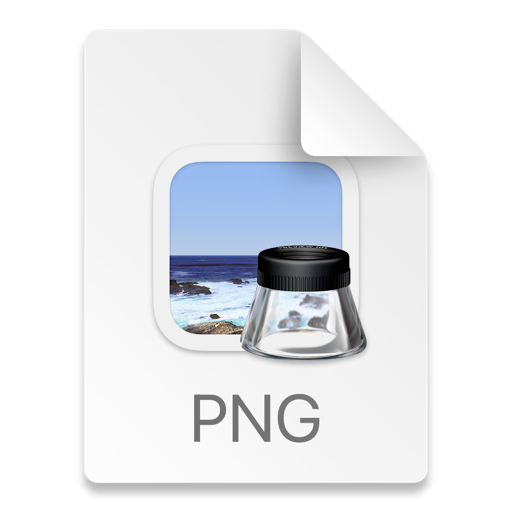